In [4]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagePath = '505.png'
cascPath = 'haarcascade_frontalface_default.xml'

faceCascade = cv2.CascadeClassifier(cascPath)

# Read the image
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
%%time
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Found {0} faces".format(len(faces)))

Found 1 faces
CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 25.8 ms


In [6]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 0)

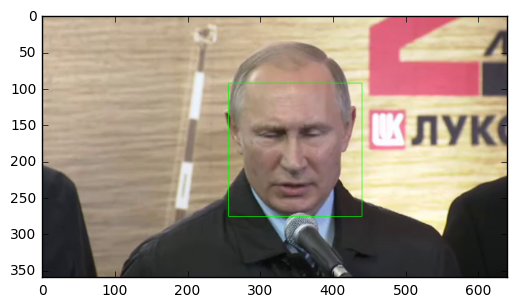

In [7]:
image = np.fliplr(image.reshape(-1,3)).reshape(image.shape) # turn to RGB
plt.imshow(image)
plt.show()

In [8]:
# Write the result to file
cv2.imwrite('found-faces-' + imagePath, image)

True